## In Class Assignment 1

1. Using the dataset of taxi cab rides, lets see how much progress we can make reverse-engineering the pricing structure into the form:

`total` = a_0 + a_1 * `distance` + a_2 * `tolls` + a_3 * `tip` + a_4 * `fare` + a_5 * `passengers`

so that one can predict the cost of future rides.

2. Are you sure that this formula is the same that the taxi uses?  Explain why or why not
    - synthesize your real world knowledge of cab rides with the results

3. (++) We expect `tip` and `tolls` to be passed directly onto customer (forcing their `a_i` coefficient to be exactly one above).  How can we build a model which accomplishes this while still optimizing the other coefficients?

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import pandas as pd

df_taxi = sns.load_dataset('taxis')
df_taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [12]:
y_feat = "total"
x_feat_list = ["distance", "tolls", "tip", "passenger"]

disp_regress = (df_taxi, x_feat_list, y_feat)
disp_regress

(                  pickup             dropoff  passengers  distance  fare  \
 0    2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0   
 1    2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0   
 2    2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5   
 3    2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0   
 4    2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0   
 ...                  ...                 ...         ...       ...   ...   
 6428 2019-03-31 09:51:53 2019-03-31 09:55:27           1      0.75   4.5   
 6429 2019-03-31 17:38:00 2019-03-31 18:34:23           1     18.74  58.0   
 6430 2019-03-23 22:55:18 2019-03-23 23:14:25           1      4.14  16.0   
 6431 2019-03-04 10:09:25 2019-03-04 10:14:29           1      1.12   6.0   
 6432 2019-03-13 19:31:22 2019-03-13 19:48:02           1      3.85  15.0   
 
        tip  tolls  total   color      payment            pickup_zone  \
 

# In Class Assignment 2

For the `first_month_covid_us.csv` dataset
1. scatter `day` & `total_cases`
    - between February 22 and March 22, 2020 (whole csv)
1. fit an exponential model to the data
1. compute / print a (not cross validated) r2 value of the exponential model
1. (extra) print a string which shows the model itself


$$ \hat{y} = \alpha_0 e^{a_1 x} $$

In [13]:
df_covid = pd.read_csv("first_month_covid_us.csv", index_col = "date")

df_covid.head()

,day,total_cases
date,,
2020-02-22,0,7.0
2020-02-23,1,8.0
2020-02-24,2,9.0
2020-02-25,3,10.0
2020-02-26,4,12.0


In [15]:
import numpy as np

x_feat = "day"
y_feat = "total_cases"

x = df_covid.loc[:, x_feat].values
y = df_covid.loc[:, y_feat].values
x = x.reshape(-1, 1)

reg = LinearRegression()
reg.fit(x, np.log(y))
y_hat = np.exp(reg.predict(x))

r2_exp = r2_score(y_true = y_true, y_pred = y_hat)

a_0_pred = reg.intercept_
a_1_pred = reg.coef_[0]
alpha0_pred = np.exp(a_0_pred)

NameError: name 'y_true' is not defined

# ICA 3
Using the x and y data generated below:

1. Write a function `fit_plot_poly(x, y, degree)`:
    - projects raw x in to polynomial features of some `degree`
    - fits a polynomial regression model
    - plots the result
        - add degree of model in title
        
1. Loop over your `fit_plot_poly()` function to fit polynomials of degree 0, 1, 2, 3, ... 10 and respond to the questions below:
    - what do you notice about r^2 as the degree of the polynomial increases
    - is the polynomial with the highest r^2 the best model (hint: no).  Why not?
        - (++) for a more compelling example, try reducing the number of observations to 11 ...
            - its tough to see the behavior of the polynomial between the 11 observatoins (should look piecewise linear).  try making and predicting a finer grained x in your `fit_plot_poly()` which allows you to observe the polynomial's behavior
   

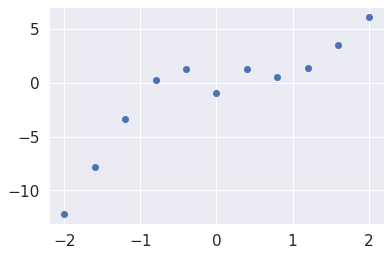

In [42]:
# initialize a polynomial and its domain
coef = np.array([0, 1, -1, 1])
x = np.linspace(-2, 2, 11)
x, y = get_poly_data(coef=coef, x=x, std_dev=1)
plt.scatter(x, y)

In [ ]:
def fit_plot_poly(x, y, degree):
    """ fits and plots a polynomial of a given degree
    
    Args:
        x (np.array): (n_samples, 1) array of x inputs
        y (np.array): (n_samples, 1) array of y inputs
        degree (int): max degree of polynomial
    """
    # create poly. from x
    poly_project = PolynomialFeatures(degree = degree)
    x_poly = poly_project.fit_transform(x)
    
    reg = LinearRegression(fit_intercept = False)
    reg.fit(x_poly, y)